## K-Means Clustering

 In this task we are going to train our model on the 'Iris.csv' dataset and predict the optimal number of clusters

In [1]:
#importing the reqiured libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#reading the dataset
df=pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
#dropping the id cloumn as it has no role in deciding the clusters
df=df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

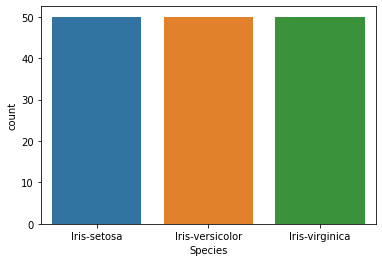

In [6]:
sns.countplot(df['Species'])

In [7]:
x=df.iloc[:, :3].values
y=df.iloc[:,-1].values.reshape(1,-1)

In the above cell 'x' denotes the features and 'y' denotes the species of Iris flowers

In [8]:
#standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

In [9]:
data_scaled

array([[-0.90068117,  1.03205722, -1.3412724 ],
       [-1.14301691, -0.1249576 , -1.3412724 ],
       [-1.38535265,  0.33784833, -1.39813811],
       [-1.50652052,  0.10644536, -1.2844067 ],
       [-1.02184904,  1.26346019, -1.3412724 ],
       [-0.53717756,  1.95766909, -1.17067529],
       [-1.50652052,  0.80065426, -1.3412724 ],
       [-1.02184904,  0.80065426, -1.2844067 ],
       [-1.74885626, -0.35636057, -1.3412724 ],
       [-1.14301691,  0.10644536, -1.2844067 ],
       [-0.53717756,  1.49486315, -1.2844067 ],
       [-1.26418478,  0.80065426, -1.227541  ],
       [-1.26418478, -0.1249576 , -1.3412724 ],
       [-1.87002413, -0.1249576 , -1.51186952],
       [-0.05250608,  2.18907205, -1.45500381],
       [-0.17367395,  3.11468391, -1.2844067 ],
       [-0.53717756,  1.95766909, -1.39813811],
       [-0.90068117,  1.03205722, -1.3412724 ],
       [-0.17367395,  1.72626612, -1.17067529],
       [-0.90068117,  1.72626612, -1.2844067 ],
       [-0.53717756,  0.80065426, -1.170

In [10]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

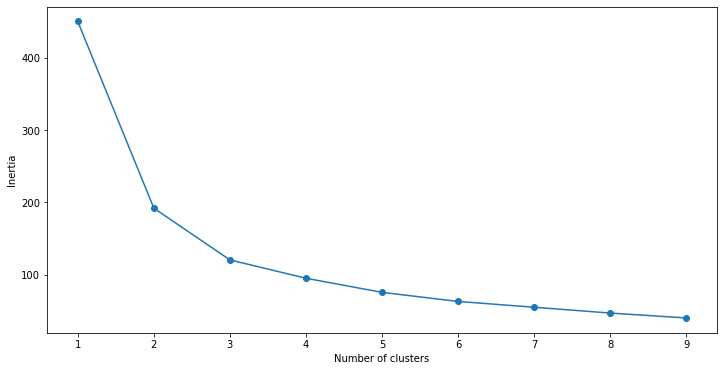

In [11]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [12]:
frame

,Cluster,SSE
0,1,450.000000
1,2,191.883095
2,3,120.355447
3,4,95.009761
4,5,75.505291
5,6,62.920772
6,7,54.920991
7,8,46.880374
8,9,40.102202


#### From above graph we observe that 3 clusters is optimal

In [13]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [14]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    52
1    49
0    49
Name: cluster, dtype: int64

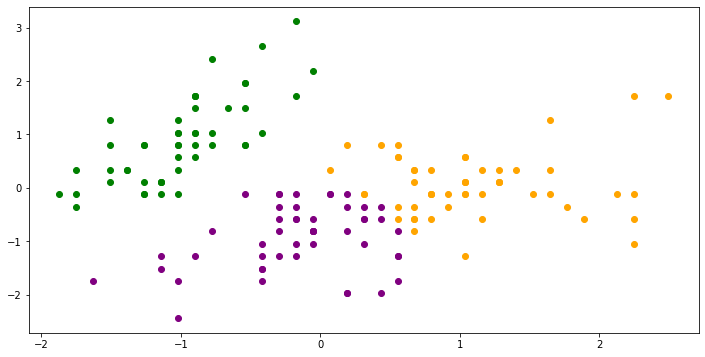

In [15]:
#Visualizing the clusters
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[pred==0,0],data_scaled[pred==0,1],c='green',label='Iris-setosa')
plt.scatter(data_scaled[pred==1,0],data_scaled[pred==1,1],c='purple',label='Iris-versicolour')
plt.scatter(data_scaled[pred==2,0],data_scaled[pred==2,1],c='orange',label='Iris-verginica')